In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:

data=pd.read_csv("the_office_series.csv")
data.head(5)

Unnamed: 0  Season   EpisodeTitle  \
0           0       1          Pilot   
1           1       1  Diversity Day   
2           2       1    Health Care   
3           3       1   The Alliance   
4           4       1     Basketball   

                                               About  Ratings  Votes  \
0  The premiere episode introduces the boss and s...      7.5   4936   
1  Michael's off color remark puts a sensitivity ...      8.3   4801   
2  Michael leaves Dwight in charge of picking the...      7.8   4024   
3  Just for a laugh, Jim agrees to an alliance wi...      8.1   3915   
4  Michael and his staff challenge the warehouse ...      8.4   4294   

   Viewership  Duration            Date GuestStars         Director  \
0        11.2        23   24 March 2005        NaN       Ken Kwapis   
1         6.0        23   29 March 2005        NaN       Ken Kwapis   
2         5.8        22    5 April 2005        NaN  Ken Whittingham   
3         5.4        23   12 April 2005        NaN     Bryan Gordon   
4         5.0        23   19 April 2005        NaN     Greg Daniels   

                                            Writers  
0  Ricky Gervais |Stephen Merchant and Greg Daniels  
1                                       B. J. Novak  
2                                  Paul Lieberstein  
3                                     Michael Schur  
4                                      Greg Daniels

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    188 non-null    int64  
 1   Season        188 non-null    int64  
 2   EpisodeTitle  188 non-null    object 
 3   About         188 non-null    object 
 4   Ratings       188 non-null    float64
 5   Votes         188 non-null    int64  
 6   Viewership    188 non-null    float64
 7   Duration      188 non-null    int64  
 8   Date          188 non-null    object 
 9   GuestStars    29 non-null     object 
 10  Director      188 non-null    object 
 11  Writers       188 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 17.8+ KB


# Renaming the name of columnsfor better visualizations

In [68]:
data.columns=['episode_number', 'season', 'episode_title', 'description', 'ratings',
       'votes', 'viewership_mil', 'duration', 'release_date', 'guest_stars',
       'director', 'writers']


In [69]:
def minmax(df):
    return round((df["ratings"]-df["ratings"].min())/(df["ratings"].max()-df["ratings"].min()),2)

In [70]:
data["ratings"].max()

9.8

In [71]:
(7.5-6.6)/(9.8-6.6)

0.28125

In [72]:
data["has_guests"]=data["guest_stars"].notnull()
data["scaled_ratings"]=minmax(data)

# if data["guest_stars"].isnull().values.any():
#     print("ok")
# has_guest=[]
# for index, rows in data.iterrows():
#     if rows["guest_stars"].isnull().values.any():
#         print(rows["guest_stars"])
# #         has_guest.append("False")
#     else:
#         has_guest.append("True")
# data["has_guest"]=has_guest
# data['has_guests', 'scaled_ratings'"]

In [98]:
data

episode_number  season     episode_title  \
0                 0       1             Pilot   
1                 1       1     Diversity Day   
2                 2       1       Health Care   
3                 3       1      The Alliance   
4                 4       1        Basketball   
..              ...     ...               ...   
183             183       9     Stairmageddon   
184             184       9    Paper Airplane   
185             185       9  Livin' the Dream   
186             186       9          A.A.R.M.   
187             187       9            Finale   

                                           description  ratings  votes  \
0    The premiere episode introduces the boss and s...      7.5   4936   
1    Michael's off color remark puts a sensitivity ...      8.3   4801   
2    Michael leaves Dwight in charge of picking the...      7.8   4024   
3    Just for a laugh, Jim agrees to an alliance wi...      8.1   3915   
4    Michael and his staff challenge the warehouse ...      8.4   4294   
..                                                 ...      ...    ...   
183  Dwight shoots Stanley with a bull tranquilizer...      8.0   1985   
184  The employees hold a paper airplane competitio...      8.0   2007   
185  Dwight becomes regional manager after Andy qui...      9.0   2831   
186  Dwight prepares for a marriage proposal and hi...      9.5   3914   
187  One year later, Dunder Mifflin employees past ...      9.8  10515   

     viewership_mil  duration    release_date  \
0             11.20        23   24 March 2005   
1              6.00        23   29 March 2005   
2              5.80        22    5 April 2005   
3              5.40        23   12 April 2005   
4              5.00        23   19 April 2005   
..              ...       ...             ...   
183            3.83        22   11 April 2013   
184            3.25        22   25 April 2013   
185            3.51        42      2 May 2013   
186            4.56        43      9 May 2013   
187            5.69        51     16 May 2013   

                                           guest_stars         director  \
0                                                  NaN       Ken Kwapis   
1                                                  NaN       Ken Kwapis   
2                                                  NaN  Ken Whittingham   
3                                                  NaN     Bryan Gordon   
4                                                  NaN     Greg Daniels   
..                                                 ...              ...   
183                                                NaN        Matt Sohn   
184                                                NaN     Jesse Peretz   
185                                 Michael Imperioli     Jeffrey Blitz   
186                                                NaN     David Rogers   
187  Joan Cusack, Ed Begley Jr, Rachel Harris, Nanc...       Ken Kwapis   

                                              writers  has_guests  \
0    Ricky Gervais |Stephen Merchant and Greg Daniels       False   
1                                         B. J. Novak       False   
2                                    Paul Lieberstein       False   
3                                       Michael Schur       False   
4                                        Greg Daniels       False   
..                                                ...         ...   
183                                      Dan Sterling       False   
184             Halsted Sullivan | Warren Lieberstein       False   
185                              Niki Schwartz-Wright        True   
186                                   Brent Forrester       False   
187                                      Greg Daniels        True   

     scaled_ratings  
0              0.28  
1              0.53  
2              0.37  
3              0.47  
4              0.56  
..              ...  
183            0.44  
184            0.44  
185       

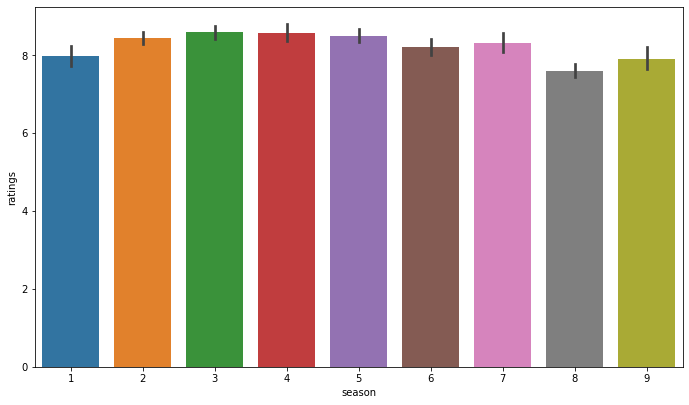

In [113]:
# Plot which seasons has the highest ratings:
plt.rcParams['figure.figsize']=[9,5]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
sns.barplot(x="season", y="ratings", data=data)
plt.show()


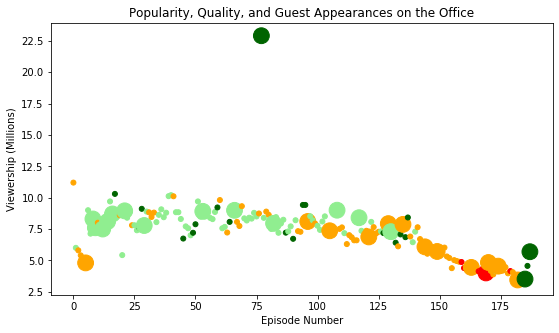

In [141]:
fig=plt.figure()
color=[]
stars=[]
for index,rows in data.iterrows():
    if rows["scaled_ratings"]>= 0.75:
        color.append("darkgreen")
        
    elif rows["scaled_ratings"]>=0.50 and rows["scaled_ratings"]<0.75:
        color.append("lightgreen")
    elif rows["scaled_ratings"]>=0.25 and rows["scaled_ratings"]<0.50:
        color.append("orange")
    else:
        color.append("red")
sizer=[]
for index,rows in data.iterrows():
    if rows["has_guests"]==True:
        sizer.append(250) 
        
    else:
        sizer.append(25)      

plt.scatter(data["episode_number"],y=data["viewership_mil"],c=color,s=sizer)
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.title("Popularity, Quality, and Guest Appearances on the Office")

plt.show()

In [110]:
top_star=data[data["viewership_mil"]>=20]["guest_stars"]
top_star

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object

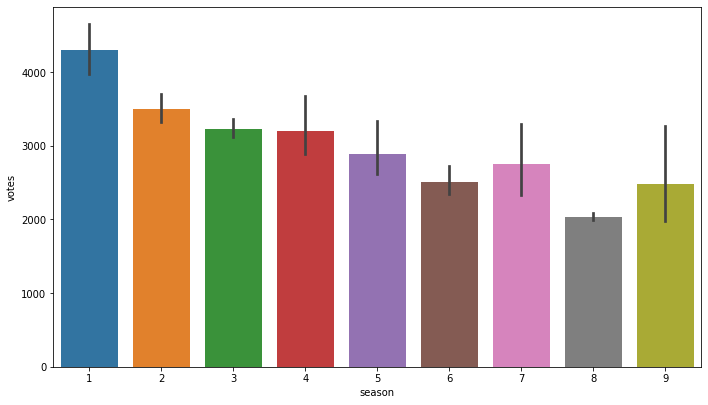

In [132]:
# Highest voted seasons
plt.rcParams['figure.figsize']=[9,5]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
sns.barplot(x="season", y="votes", data=data)
plt.title("The seasons verses highest votes.")
plt.show()


The seasons rating verses vote given

   season        votes   ratings  viewership_mil   duration
0       1  4304.000000  7.966667        6.366667  22.833333
1       2  3493.909091  8.440909        8.168182  22.636364
2       3  3224.086957  8.586957        8.494348  25.782609
3       4  3195.642857  8.564286        8.547857  32.500000
4       5  2885.615385  8.488462        8.756538  28.884615
5       6  2505.307692  8.196154        7.766154  29.038462
6       7  2748.083333  8.308333        7.305833  31.083333
7       8  2039.250000  7.604167        5.385417  23.000000
8       9  2475.826087  7.913043        4.138696  26.043478


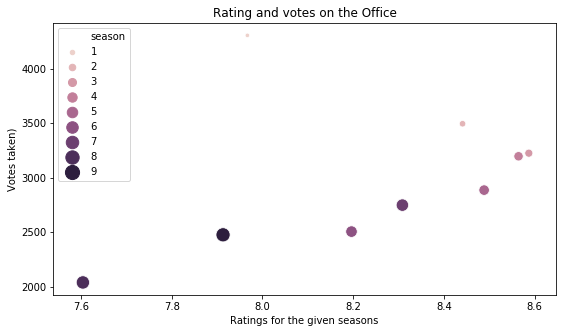

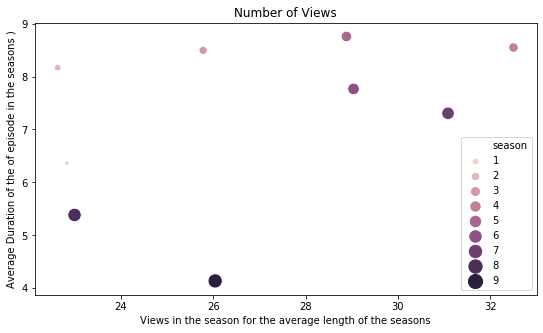

In [167]:
fig=plt.figure()


df=data.groupby('season')[['votes','ratings',"viewership_mil",'duration']].mean().reset_index()

print(df)
seasons=data["season"]
sns.scatterplot(data=df, x="ratings", y="votes", hue="season",size="season",
    sizes=(20, 200), legend="full")
plt.xlabel("Ratings for the given seasons")
plt.ylabel("Votes taken)")
plt.title("Rating and votes on the Office")
plt.legend()
plt.show()
sns.scatterplot(data=df, x="duration", y="viewership_mil", hue="season",size="season",
    sizes=(20, 200), legend="full")
plt.xlabel("Views in the season for the average length of the seasons")
plt.ylabel("Average Duration of the of episode in the seasons )")
plt.title("Number of Views")
plt.legend()
# plt.scatter(df["ratings"],y=df["votes"],c=df["season"] ,s=df["viewership_mil"],label=df["season"])

plt.show()